In [7]:
#Primero vamos a importar las librerías que vamos a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


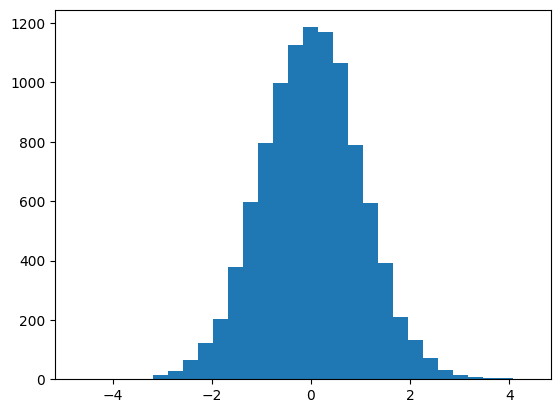

In [4]:
#Vamos a generar un conjunto de datos aleatorios de ejemplo, pero que tienen una distribución normal
#Para esto vamos a utilizar la función np.random.normal

#Vamos a generar 1000 datos aleatorios con una distribución normal
#La función np.random.normal recibe como parámetros la media, la desviación estándar y la cantidad de datos a generar

datos = np.random.normal(size = 10000) #Generamos 1000 datos aleatorios con una distribución normal
plt.hist(datos, bins=30) #Graficamos el histograma de los datos
plt.show() #Mostramos el gráfico

### Distribución parametrizada

- Lo que vamos a hacer a continuación es estimar la distribución de unos datos a través de fozarla a tener una distribución dados unos parámetros.

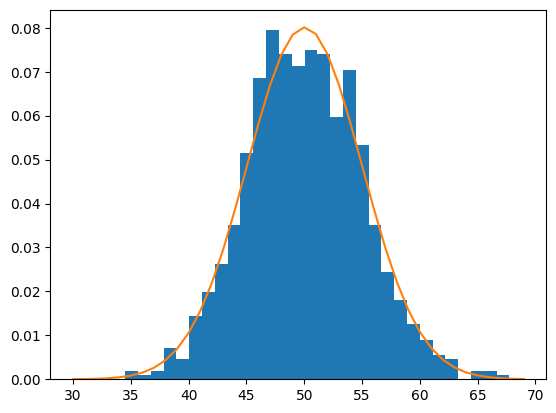

In [10]:
datos_ejemplo = np.random.normal(loc=50, scale=5, size=1000) #Generamos 1000 datos aleatorios con una distribución normal, loc es la media y scale es la desviación estándar
mu = datos_ejemplo.mean() #Calculamos la media de los datos
sigma = datos_ejemplo.std() #Calculamos la desviación estándar de los datos
distribucion_normal = norm(mu, sigma) #Creamos una distribución normal teórica con la media y la desviación estándar de los datos
values = [value for value in range(30, 70)] #Creamos una lista de valores entre 30 y 70 siendo estos los valores teóricos de la distribución normal
probabilidades = [distribucion_normal.pdf(value) for value in values] #Calculamos las probabilidades de cada valor de la distribución normal
plt.hist(datos_ejemplo, bins=30, density=True) #Graficamos el histograma de los datos
plt.plot(values, probabilidades) #Graficamos la distribución normal
plt.show() #Mostramos el gráfico

### Distribución no parametrizada

- Lo que vamos a hacer a continuación es usar la librería de scikit-learn para estimar la distribución de unos datos a través de usar dos cosas:
    - Un parámetro de suavizado
    - Un método de estimación de la distribución


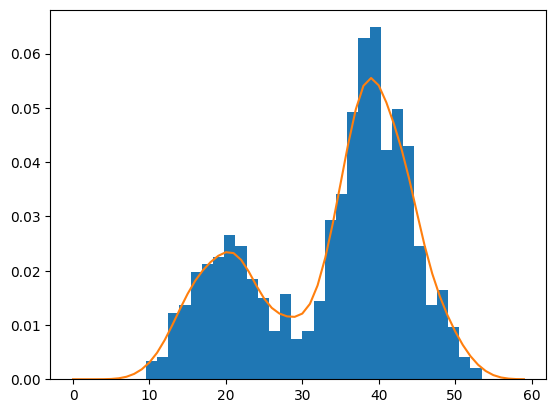

In [11]:
#Primero vamos a importar un par de librerías que vamos a utilizar

from numpy import hstack #Para concatenar arreglos
from sklearn.neighbors import KernelDensity #Para calcular la distribución de probabilidad

#Vamos a construir una distribución binomial
datos_ejemplo1 = np.random.normal(loc = 20, scale = 5, size = 300) #Generamos 1000 datos aleatorios con una distribución normal, loc es la media y scale es la desviación estándar
datos_ejemplo2 = np.random.normal(loc = 40, scale = 5, size = 700) #Generamos 1000 datos aleatorios con una distribución normal, loc es la media y scale es la desviación estándar
datos = hstack((datos_ejemplo1, datos_ejemplo2)) #Concatenamos los datos

#Obtenemos el kerneldensity y lo ajustamos a los datos
modelado = KernelDensity(bandwidth=2, kernel='gaussian') #Creamos el modelo de kerneldensity con un parámetro de suavizado de 2 y una distribución gaussiana
modelado.fit(datos.reshape(-1, 1)) #Ajustamos el modelo a los datos y hacemos un reshape para que los datos tengan la forma correcta

#Creamos una distribución que cumpla con los criterios de nuestra anterior distribución
valores = np.asarray([valor for valor in range(0, 60)]) #Creamos una lista de valores entre 0 y 60
valores = valores.reshape((len(valores), 1)) #Hacemos un reshape para que los valores tengan la forma correcta
probabilidades = modelado.score_samples(valores) #Calculamos las probabilidades de cada valor de la distribución normal
probabilidades = np.exp(probabilidades) #Calculamos las probabilidades de cada valor de la distribución normal

#Graficamos la distribución
plt.hist(datos, bins=30, density=True) #Graficamos el histograma de los datos
plt.plot(valores, probabilidades) #Graficamos la distribución normal
plt.show() #Mostramos el gráfico